<a href="https://colab.research.google.com/github/rikvik2006/MNIST-Challenge-PyTorch/blob/master/MNIST_Exercise_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installiamo le Dipendenze
Di default Google Collab ha gia installato le dipendenze che ci servono

## Imports
Importiamo i moduli che ci servono, dobbiamo importare torch, come libreria pricipale e poi la libreria torchvision, e da questa importiamo i 2 package datasets, e transforms

In [ ]:
import torch
from torchvision import datasets, transforms

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## Import per aggiustare i weights

In [ ]:
import torch.optim as optim

Importiamo matploitlib per la visualizzazzione delle immagini

In [ ]:
import matplotlib.pyplot as plt

## Controliamo se la GPU è disponibile

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🖥️", device)

🖥️ cpu


# Neural Network Classes
Creiamo la classe della rete neurale, le classi delle reti neurali devono ereditare tutte dalla classe `nn.Module` che è la classe di base delle classi delle neural network.




In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Immagine 28x28 = 784

    # Creiamo delle proprietà per che equivalgono ad ogni layer della rete neurale
    # Ogni neurone ha bisono di definire una funzione, noi utilizziamo la funzione Lineare
    # La funzione richiede come primo argomento il numero di neuroni in entrata, mentre il secondo paramentro indica i dati di output che devono uscire da ogni neurone
    self.inputLayer = nn.Linear(784, 64)
    # Ora definiamo
    self.hidden1 = nn.Linear(64, 64)  # Hidden 1 richide un tesore con 64 elemneti e restituisce un tesore con 64 elementi
    self.hidden2 = nn.Linear(64, 64)
    self.ouputLayer = nn.Linear(64, 10)

  def forward(self, data):
    data = F.relu(self.inputLayer(data))
    data = F.relu(self.hidden1(data))
    data = F.relu(self.hidden2(data))
    data = self.ouputLayer(data)

    return F.log_softmax(data, dim=1)

In [ ]:
trainingData = datasets.MNIST("", train=True, download=True, transform=transforms.ToTensor());
testingData = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 91673379.88it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 71677925.34it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29793695.65it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13784753.09it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
trainSet = torch.utils.data.DataLoader(trainingData, batch_size=10, shuffle=True)
testSet = torch.utils.data.DataLoader(testingData, batch_size=10, shuffle=True)

# Instanziamo la rete neurale

In [ ]:
network = Network().to(device)

# Learning process


In [ ]:
learningRate = optim.Adam(network.parameters(), lr=0.01)
epochs = 4

🟣 tensor(0.4029, device='cuda:0', grad_fn=<NllLossBackward0>)
🟣 tensor(3.1166, device='cuda:0', grad_fn=<NllLossBackward0>)
🟣 tensor(0.2646, device='cuda:0', grad_fn=<NllLossBackward0>)
🟣 tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward0>)


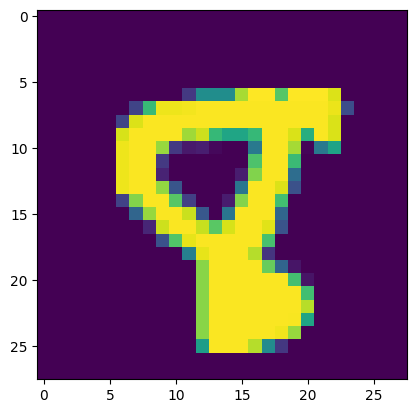

In [ ]:
for i in range(epochs):
  for images, labels in trainSet:
    # images, labels = data            <----            # Data is a tuple containg the batch, one is an array containg 10 (as the batch size)
                                                        # tensor of the images, and the other is an array containg the 10 labels that are the
                                                        # numbers write in the images
    images, labels = images.to(device), labels.to(device)

    network.zero_grad()
    outputs = network(images.view(-1, 784))
    # print("⚪", result)
    # print("🔢", labels)
    # print (f"🧪 ({result.shape} : {labels.shape})")
    loss = F.nll_loss(outputs, labels)
    # print("🔵", loss)
    loss.backward()
    # print("🔵", loss)
    learningRate.step()
    plt.imshow(images[0].cpu().view(28,28))
  print("🟣", loss)

    # print("---------------")
    # print(image)
    # print("---------------")
    # print(output)
    # print("---------------")
    # break

# Salviamo i pesi del modello

In [ ]:
weight_version = 0

In [ ]:
# Salva i pesi del modello in un file (cwd: /content)
weight_version += 1
torch.save(network.state_dict(), f'MNIST_model_weights.pth.v{weight_version}')
print("Pesi del modello salvati.")

Pesi del modello salvati.


# Carichiamo i pesi del modello

In [78]:
# Carica i pesi del modello da un file
network.load_state_dict(torch.load('MNIST_model_weights.pth', map_location=device))
print("Pesi del modello caricati.")

Pesi del modello caricati.


In [79]:
correct = 0
total = 0

with torch.no_grad():
  for images, labels in testSet:
    images, labels = images.to(device), labels.to(device)
    # print("🟩", images)
    # print("🔢", labels)
    result = network(images.view(-1, 784))
    # print("⚪", result)
    for index, tensorValue in enumerate(result):
      total += 1
      if torch.argmax(tensorValue) == labels[index]:
        correct += 1

accuracy = correct / total
accuracyPercentage = accuracy * 100
print(f"Accuracy {accuracy}, Accuracy Percetage {accuracyPercentage}%")

Accuracy 0.9317, Accuracy Percetage 93.17%


# Predizione di immagini custom
Importiamo Pillow e numpy, questo serve per modificare le immagini create da noi in modo tale che siano pronte per passare attraverso la nostra rete neurale.

Con pillow prediamo l'immagine dal file system e la modifichiamo. Con numpy trasformiamo l'immagine (PIL.Image) in un array numpy (np.array), la funzione np.array supporta le immagine PIL e quindi riusiamo a convertirla in una array.
Normaliziamo anche l'immagine tra 0 e 1 dividendo la matrice per 255.


In [80]:
from PIL import Image
import PIL.ImageOps
import numpy as np

tensor(5)
Predicted number: 5


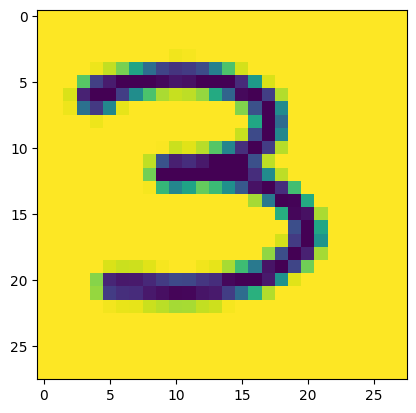

In [92]:
network.eval()
image = Image.open("imgSite3.png")
image = image.resize((28, 28))     # Resize the image and convert to grayscale
image = image.convert("L")
image = PIL.ImageOps.invert(image)

plt.imshow(image)

image = np.array(image)
image = image / 255                               # Normalize the array image beetween 0 and 1
image = torch.from_numpy(image)                   # Transform the numpy array in a torch tensor
image = image.float()
image = image.to(device)                          # Convert the tensor to a float tensor

with torch.no_grad():
  result = network.forward(image.view(-1, 28*28)) # Change the shape of a tensor in a matrix with "n" array with 28*28 elements
  prediction = torch.argmax(result)
  print(prediction)
  predicted_number = prediction.item()
  print("Predicted number:", predicted_number)

# API per la comunicazione con l'interfaccia WEB

In [ ]:
!pip install "fastapi[all]"  -q
!pip install 'uvicorn[standard]' -q
!pip install pyngrok -q
!pip install nest_asyncio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 755.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.8/428.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [94]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
import uvicorn
from pyngrok import ngrok, conf
import nest_asyncio
import base64
from io import BytesIO

In [95]:
app = FastAPI()

In [96]:
app.add_middleware(
    CORSMiddleware ,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [97]:
@app.get("/")
def root() -> None:
  return { "msg": "Base url" }

## Enpoint per la predizione delle immagini

In [98]:
class ImageBody(BaseModel):
  buffer: str

In [99]:
imageNumber = 0
@app.post("/api/predict")
def predict_image(image: ImageBody) -> dict[str, int]:
  print("⚪", image)
  print(image.buffer)

  image_data = image.buffer.replace("data:image/png;base64,", "")
  decoded_image_data = base64.b64decode(image_data)

  image = Image.open(BytesIO(decoded_image_data))

  # imageNumber += 1
  # img.save(f"imageN{imageNumber}")

  network.eval()
  image = image.resize((28, 28))     # Resize the image and convert to grayscale
  image = image.convert("L")

  # The image whe seed from the client is drawn white on black, so we don't need to invert
  # image = PIL.ImageOps.invert(image)

  image = np.array(image)
  image = image / 255                               # Normalize the array image beetween 0 and 1
  image = torch.from_numpy(image)                   # Transform the numpy array in a torch tensor
  image = image.float()
  image = image.to(device)                          # Convert the tensor to a float tensor

  with torch.no_grad():
    result = network.forward(image.view(-1, 28*28)) # Change the shape of a tensor in a matrix with "n" array with 28*28 elements
    prediction = torch.argmax(result)
    print(prediction)
    predicted_number = prediction.item()
    print("Predicted number:", predicted_number)
    # print("Probs:", result[predicted_number])
    return { "predicted": predicted_number }

# NGROK Server

🔗 Public URL: https://4677-35-226-26-38.ngrok-free.app


INFO:     Started server process [417]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:3001 (Press CTRL+C to quit)


INFO:     87.5.170.82:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     87.5.170.82:0 - "GET /openapi.json HTTP/1.1" 200 OK
⚪ buffer=''

tensor(3)
Predicted number: 3
INFO:     87.5.170.82:0 - "POST /api/predict HTTP/1.1" 200 OK
INFO:     87.5.170.82:0 - "POST /api/predict HTTP/1.1" 422 Unprocessable Entity
INFO:     87.5.170.82:0 - "POST /api/predict HTTP/1.1" 422 Unprocessable Entity
INFO:     87.5.170.82:0 - "OPTIONS /api/predict HTTP/1.1" 200 OK
⚪ buffer=''

tensor(3)
Predicted number: 3
INFO:     87.5.170.82:0 - "POST /api/predict HTTP/1.1" 200 OK

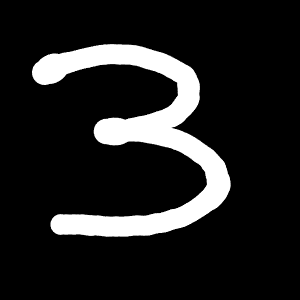
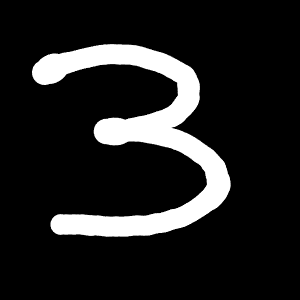
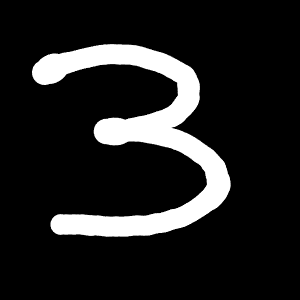
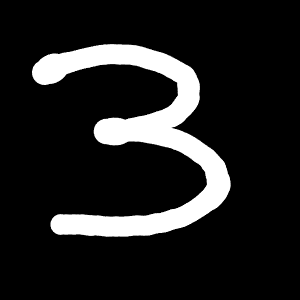

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [417]


In [100]:
ngrok.set_auth_token("2Uhz6hu4FEfQhc9qmjfh1OIF1RY_2hwRT821sW6t1tz8LVbc7")
ngrok_tunnel = ngrok.connect(3001)
print("🔗 Public URL:", ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=3001)